/tmp/ipython-input-1-3689170516.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


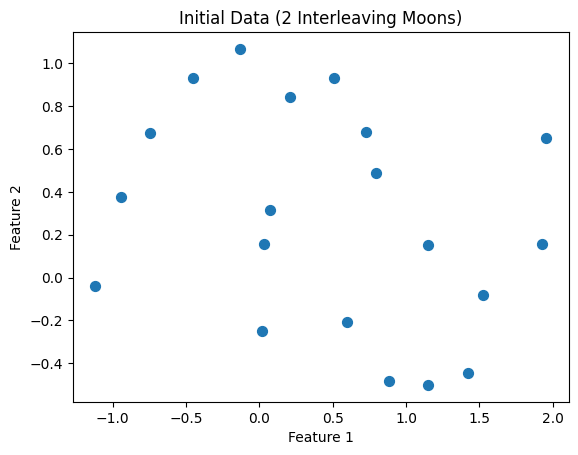

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate synthetic data with 2 moon-shaped clusters
X, y = make_moons(n_samples=20, noise=0.1, random_state=42)

# Visualize the initial dataset
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Initial Data (2 Interleaving Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:
def kmeans_algorithm(X, k=2, max_iters=10):
    # Initialize random centroids
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]

    for iteration in range(max_iters):
        # Step 1: Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centroids by computing the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Plot the current centroids and data points
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=200, marker='X')
        plt.title(f"K-means Clustering (Iteration {iteration + 1})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

        # Step 3: Check if centroids have converged (if no change)
        if np.all(centroids == new_centroids):
            print(f"Centroids converged at iteration {iteration + 1}")
            break

        centroids = new_centroids


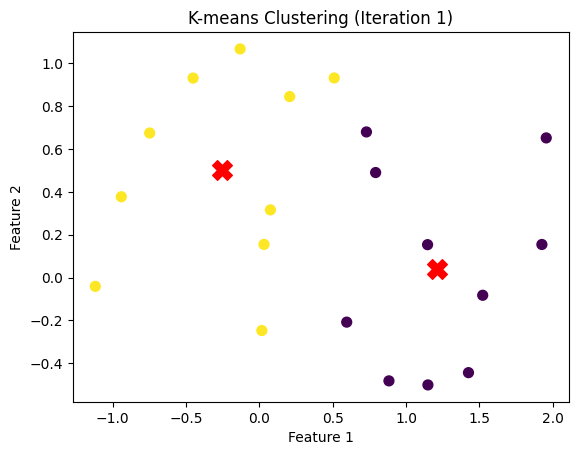

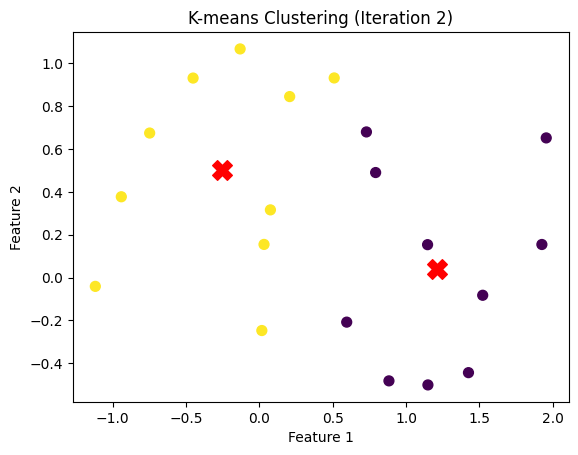

Centroids converged at iteration 2


In [3]:
kmeans_algorithm(X, k=2, max_iters=10)